# **Problem definition:**
  The aim of this project is to develop a machine learning model that can predict the likelihood of an individual having heart disease based on various health-related features. The model will be trained on a dataset containing information such as age, gender, cholesterol levels, blood pressure, and other relevant factors. The primary objective is to create a reliable and accurate predictive tool that can assist in early identification and intervention for individuals at risk of heart disease, ultimately contributing to improved healthcare outcomes.

<font size="6px">**Installation**</font><br>
Here we install necessary modules for our projects.

1. <font size="5px">**Pandas :**</font><br>
      Pandas is a powerful data manipulation and analysis library. It will be used to load and manipulate the dataset.

2.  <font size="5px">**Numpy :**</font><br>
       NumPy is a fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

3.  <font size="5px">**Matplotlib & Seaborn :**</font><br>
      Matplotlib is a widely used plotting library, and Seaborn is built on top of Matplotlib, providing additional features and a higher-level interface for statistical graphics. These libraries will be used for data visualization.

4.  <font size="5px">**Scikit-learn :**</font><br>
      Scikit-learn is a machine learning library that includes various tools for data preprocessing, modeling, and evaluation. It will be used for splitting the dataset, training models, and evaluating performance metrics.

*In google colab most of these modules are already installed*


In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

# **Data collection**
Here we importing all necessary package into our projects 💻

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


**Importing dataset for machine learning**

In [6]:
dataset = "/content/drive/MyDrive/Colab Notebooks/heart_disease_dataset.csv"
df = pd.read_csv(dataset)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **Data visualization**
This visualization helps us to understand the dataset.

***Visualize the distribution of the target variable***<br>


*   **'sns.countplot'** is a Seaborn function used to show the counts of observations in each category of a categorical variable. Here, it's used to visualize the distribution of the target variable ('target'), which indicates the presence or absence of heart disease (1 for presence, 0 for absence).

*   **'plt.title'** adds a title to the plot.

*   **'plt.show()'** displays the plot






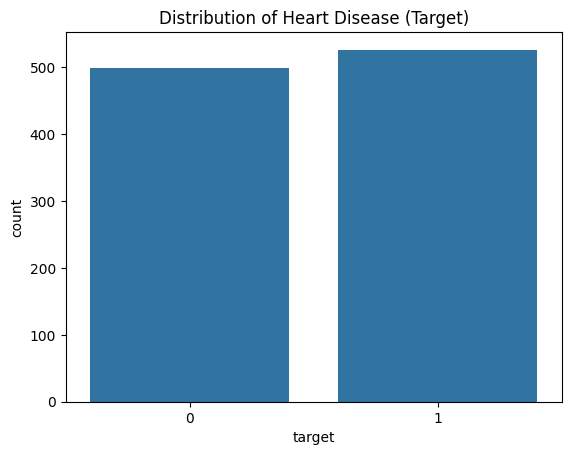

In [20]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease (Target)')
plt.show()

***Visualize the distribution of age***


*   **'plt.figure()'** sets the size of the figure to be plotted.
*   **'sns.histplot'** is used to create a histogram of the **'age'** variable. The **'bins (intervals)'** parameter defines the number of intervals for the histogram, and **'kde=True'** adds a kernel density estimate curve to the plot.


<font color="#99ccff" size='5px'>*same applicable for below visualization*</font>



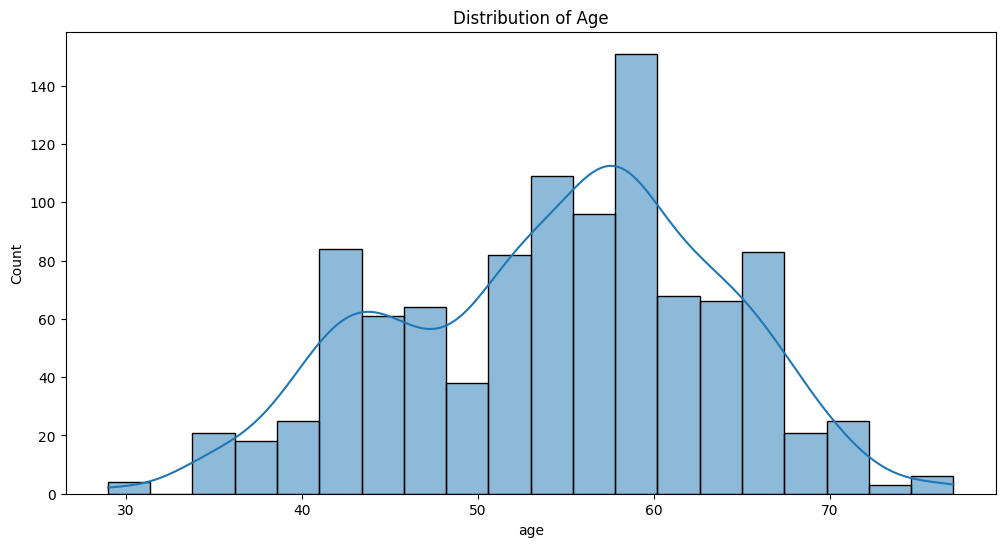

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(x='age', data=df, bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

***Visualize the distribution of cholesterol levels***

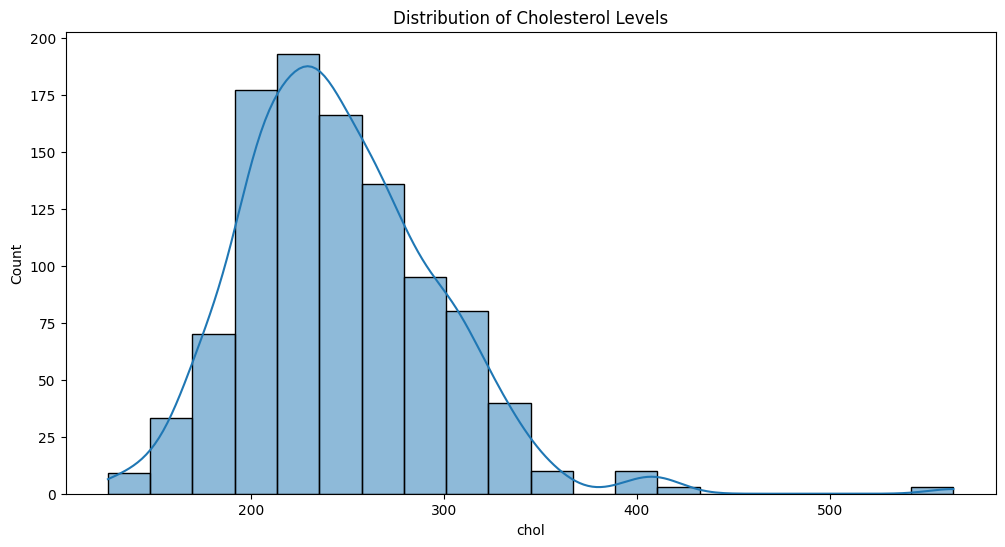

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(x='chol', data=df, bins=20, kde=True)
plt.title('Distribution of Cholesterol Levels')
plt.show()

**Checking whether dataset has null or empty values.**


Null values lead to biased representation and other quality issues.

In [24]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **Data preprocessing:**

**Encoding:**


  Encoding is necessary when working with machine learning algorithms that require numerical input, as these algorithms typically operate on numerical data rather than categorical data. If you don't encode categorical variables, the model might misinterpret the categories as ordinal or introduce biases that could affect the performance of your model.

**Get dummies method:**

   **'pd.get_dummies()'** method is used for one-hot encoding. It creates binary columns for each category and indicates the presence of the category with a 1, and absence with a 0. This ensures that the model doesn't interpret numerical values assigned during encoding as having ordinal relationships.

In [29]:

# Encode categorical variables
heart_data = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

heart_data.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


**Train Test split**

We used train_test_split from scikit-learn to split the data into training and testing sets. This is essential to assess how well the model performs on unseen data.

**'test_size'** helps us divide the usage for test & training.

In the provided code, 'test_size=0.2' means that 20% of the data will be used for testing, and the remaining 80% will be used for training.
**'random_state'** helps us to ensures reproducibility. If you use the same random seed, you'll get the same train-test split every time you run the code.


The choice of 'random_state' can be any integer, using 42 is a convention, but you could use any other integer.

<font color="#99ccff">*Choice is ours, based on the dataset we can decide.*</font>

In [31]:
X = heart_data.drop('target', axis=1)#dropping target column for machine learning.
y = heart_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)